In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Importing Data and Overview

In [2]:
pima = pd.read_csv('/Users/Shared/Shyam/Datasets/diabetes.csv')

In [3]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Statistical summary

pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Replacing zeros and outliers with nan

In [6]:
cols = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']
pima[cols] = pima[cols].replace(0 , np.nan)

In [7]:
for feature in pima[cols]:
    mean = np.mean(pima[feature].dropna())
    std = np.std(pima[feature].dropna())
    for data in pima[feature].dropna():
        z = (data - mean) / std
        if abs(z) > 3:
            pima[feature].replace(data , np.nan , inplace = True)

#### Visualizing target variable

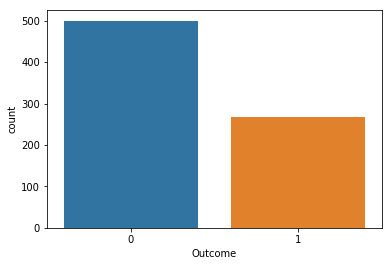

In [8]:
sns.countplot(pima['Outcome'])

plt.show()

#### Handling null values

In [9]:
pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                43
SkinThickness               229
Insulin                     382
BMI                          15
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state = 42)
imputed_pima = pd.DataFrame(imputer.fit_transform(pima) , columns = pima.columns)

#### Checking distribution of features after imputation

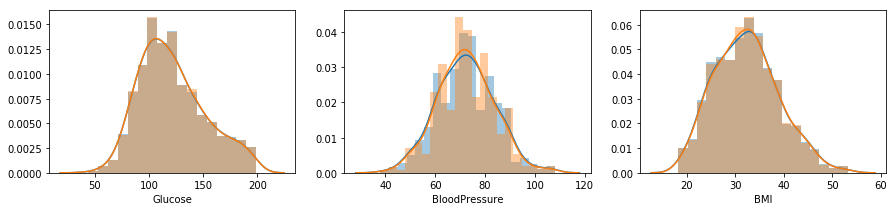

In [11]:
fig , ax = plt.subplots(ncols = 3 , figsize = (15 , 3))

sns.distplot(pima['Glucose'].dropna() , ax = ax[0])
sns.distplot(imputed_pima['Glucose'] , ax = ax[0])

sns.distplot(pima['BloodPressure'].dropna() , ax = ax[1])
sns.distplot(imputed_pima['BloodPressure'] , ax = ax[1])

sns.distplot(pima['BMI'].dropna() , ax = ax[2])
sns.distplot(imputed_pima['BMI'] , ax = ax[2])

plt.show()

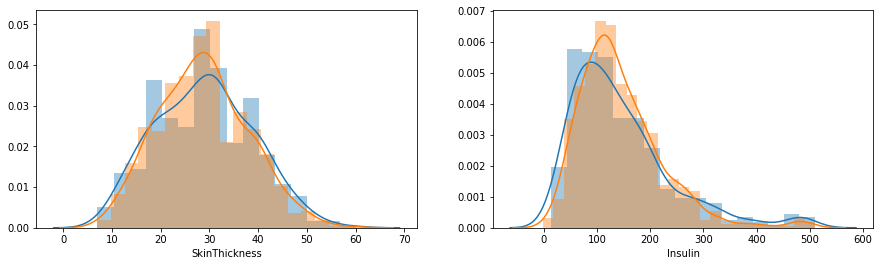

In [12]:
fig , ax = plt.subplots(ncols = 2 , figsize = (15 , 4))

sns.distplot(pima['SkinThickness'].dropna() , ax = ax[0])
sns.distplot(imputed_pima['SkinThickness'] , ax = ax[0])

sns.distplot(pima['Insulin'].dropna() , ax = ax[1])
sns.distplot(imputed_pima['Insulin'] , ax = ax[1])

plt.show()

#### Visualizing relationship of target variable with features

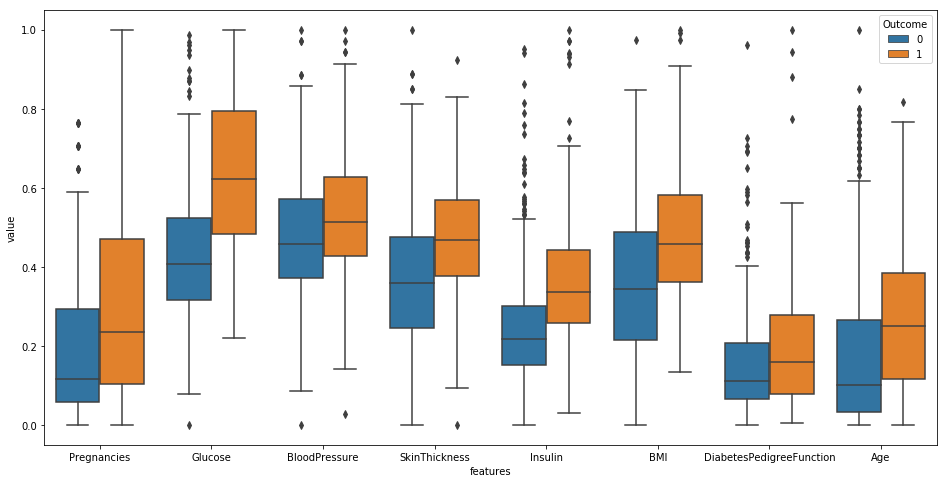

In [13]:
from sklearn.preprocessing import MinMaxScaler

features = imputed_pima.drop('Outcome' , axis = 1)
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features) , columns = features.columns)

y = pima.Outcome
X = scaled_features

data = pd.concat([y , X] , axis = 1)

data = pd.melt(data , id_vars= 'Outcome' , var_name = 'features', value_name = 'value')

plt.figure(figsize = (16 , 8))

sns.boxplot(x = 'features' , y = 'value' , hue = 'Outcome' , data = data)

plt.xticks()

plt.show()

#### Heatmap for visualising correlation


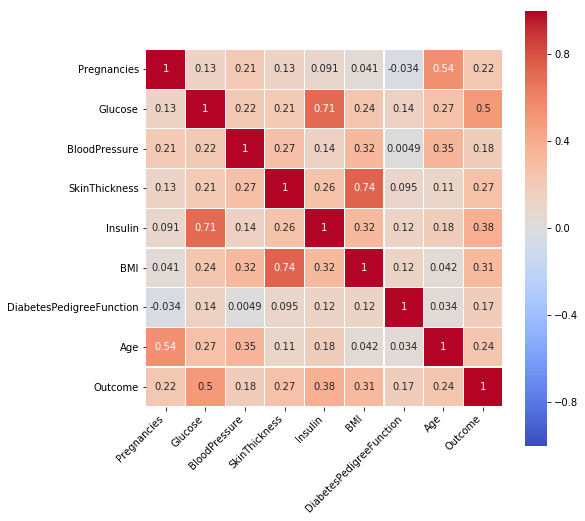

In [14]:
fig , ax = plt.subplots(figsize = (8 , 8)) 

sns.heatmap(imputed_pima.corr() , vmin = -1 , vmax = 1 , center = 0 , square = True , 
                 cmap = 'coolwarm' , linewidths = 0.2 , annot = True)

ax.set_xticklabels(ax.get_xticklabels() , rotation = 45 , horizontalalignment = 'right')

plt.show()

#### Feature Engineering

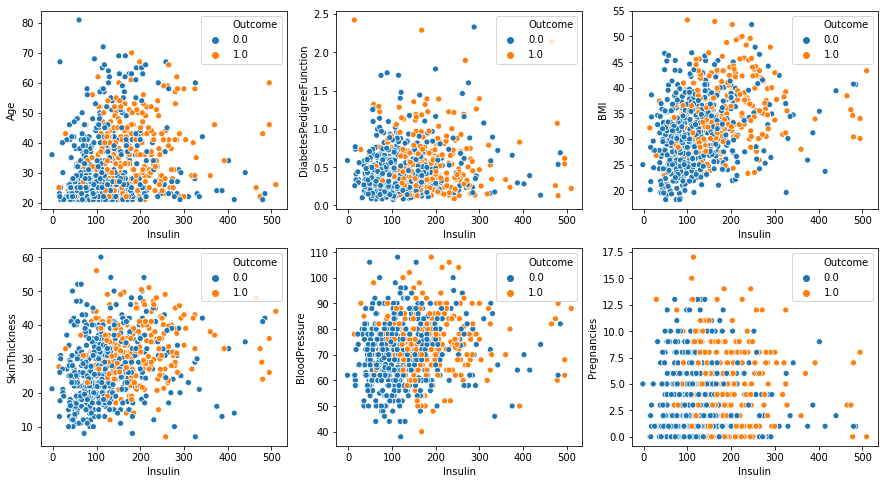

In [15]:
fig , ax = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15 , 8))

sns.scatterplot(x = 'Insulin' , y = 'Age' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 0])
sns.scatterplot(x = 'Insulin' , y = 'DiabetesPedigreeFunction' , hue = 'Outcome' , data = imputed_pima , 
                ax = ax[0 , 1])
sns.scatterplot(x = 'Insulin' , y = 'BMI' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 2])
sns.scatterplot(x = 'Insulin' , y = 'SkinThickness' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 0])
sns.scatterplot(x = 'Insulin' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 1])
sns.scatterplot(x = 'Insulin' , y = 'Pregnancies' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 2])

plt.show()

In [16]:
#Creating new features based on the relationship between Insulin and other features


X.loc[: , 'healthy_insulin'] = 0
X.loc[imputed_pima['Insulin'] < 101 , 'healthy_insulin'] = 1

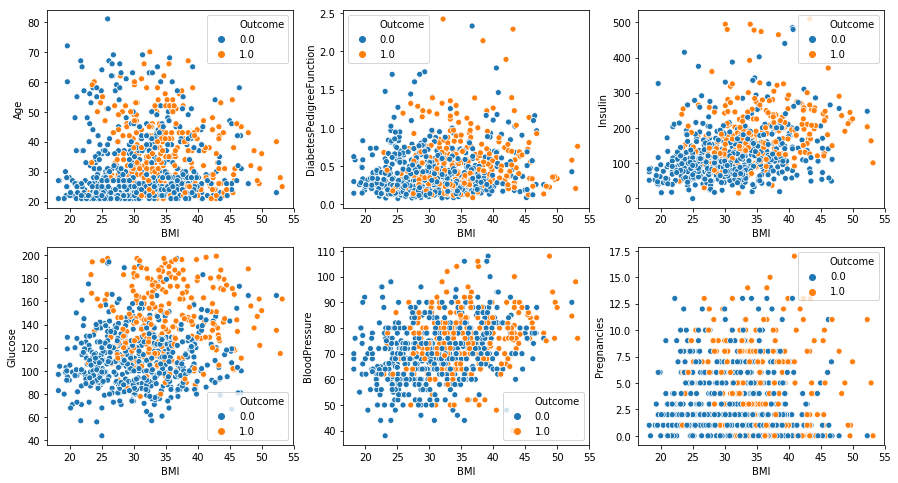

In [17]:
fig , ax = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15 , 8))

sns.scatterplot(x = 'BMI' , y = 'Age' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 0])
sns.scatterplot(x = 'BMI' , y = 'DiabetesPedigreeFunction' , hue = 'Outcome' , data = imputed_pima , 
                ax = ax[0 , 1])
sns.scatterplot(x = 'BMI' , y = 'Insulin' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 2])
sns.scatterplot(x = 'BMI' , y = 'Glucose' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 0])
sns.scatterplot(x = 'BMI' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 1])
sns.scatterplot(x = 'BMI' , y = 'Pregnancies' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 2])

plt.show()

In [18]:
#Creating new features based on the relationship between BMI and other features


X.loc[: , 'healthy_BMI'] = 0
X.loc[imputed_pima['BMI'] < 28 , 'healthy_BMI'] = 1

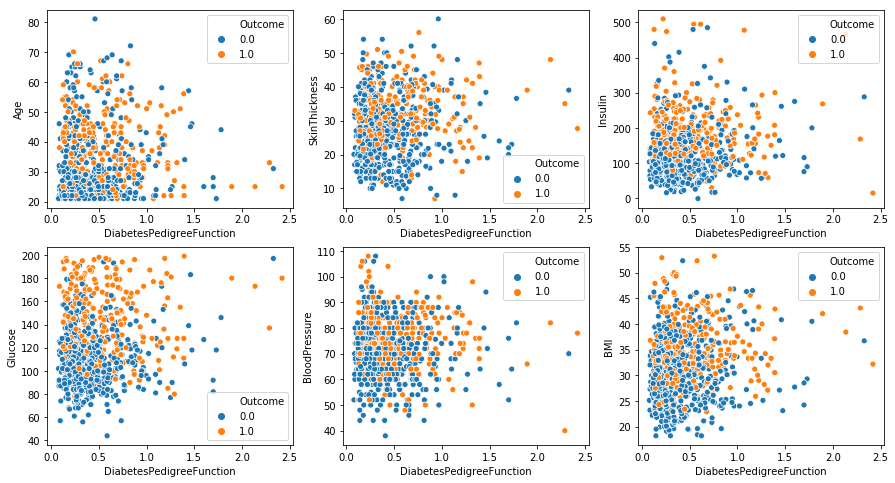

In [19]:
fig , ax = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15 , 8))

sns.scatterplot(x = 'DiabetesPedigreeFunction' , y = 'Age' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 0])
sns.scatterplot(x = 'DiabetesPedigreeFunction' , y = 'SkinThickness' , hue = 'Outcome' , data = imputed_pima , 
                ax = ax[0 , 1])
sns.scatterplot(x = 'DiabetesPedigreeFunction' , y = 'Insulin' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 2])
sns.scatterplot(x = 'DiabetesPedigreeFunction' , y = 'Glucose' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 0])
sns.scatterplot(x = 'DiabetesPedigreeFunction' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 1])
sns.scatterplot(x = 'DiabetesPedigreeFunction' , y = 'BMI' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 2])

plt.show()

In [20]:
#Creating new features based on the relationship between DiabetesPedigreeFunction and other features

X.loc[: , 'DPFvGlucose'] = 0
X.loc[(imputed_pima['DiabetesPedigreeFunction'] <= 0.5) & (imputed_pima['Glucose'] <= 100), 
                  'DPFvGlucose'] = 1

X.loc[: , 'DPFvST'] = 0
X.loc[(imputed_pima['DiabetesPedigreeFunction'] <= 0.6) & (imputed_pima['SkinThickness'] <= 20), 
                  'DPFvST'] = 1

X.loc[: , 'DPFvInsulin'] = 0
X.loc[(imputed_pima['DiabetesPedigreeFunction'] <= 0.6) & (imputed_pima['Insulin'] <= 100), 
                  'DPFvInsulin'] = 1

X.loc[: , 'DPFvBMI'] = 0
X.loc[(imputed_pima['DiabetesPedigreeFunction'] <= 0.5) & (imputed_pima['BMI'] <= 20), 
                  'DPFvBMI'] = 1

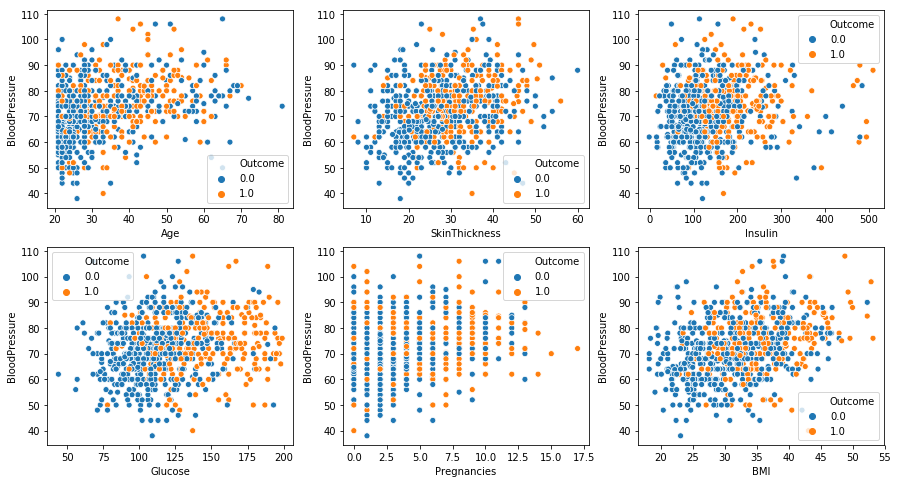

In [21]:
fig , ax = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15 , 8))

sns.scatterplot(x = 'Age' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 0])
sns.scatterplot(x = 'SkinThickness' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , 
                ax = ax[0 , 1])
sns.scatterplot(x = 'Insulin' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[0 , 2])
sns.scatterplot(x = 'Glucose' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 0])
sns.scatterplot(x = 'Pregnancies' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 1])
sns.scatterplot(x = 'BMI' , y = 'BloodPressure' , hue = 'Outcome' , data = imputed_pima , ax = ax[1 , 2])

plt.show()

In [22]:
#Creating new features based on the relationship between BloodPressure and other features

X.loc[: , 'BPvInsulin'] = 0
X.loc[(imputed_pima['BloodPressure'] <= 75) & (imputed_pima['Insulin'] <= 100), 
                  'BPvInsulin'] = 1

X.loc[: , 'BPvGlucose'] = 0
X.loc[(imputed_pima['BloodPressure'] <= 70) & (imputed_pima['Glucose'] <= 100), 
                  'BPvGlucose'] = 1

#### Preparing final dataset and visalizing correlation

In [23]:
final_data = X.drop(['Insulin' , 'BMI'] , axis = 1)
final_data['Outcome'] = imputed_pima['Outcome']

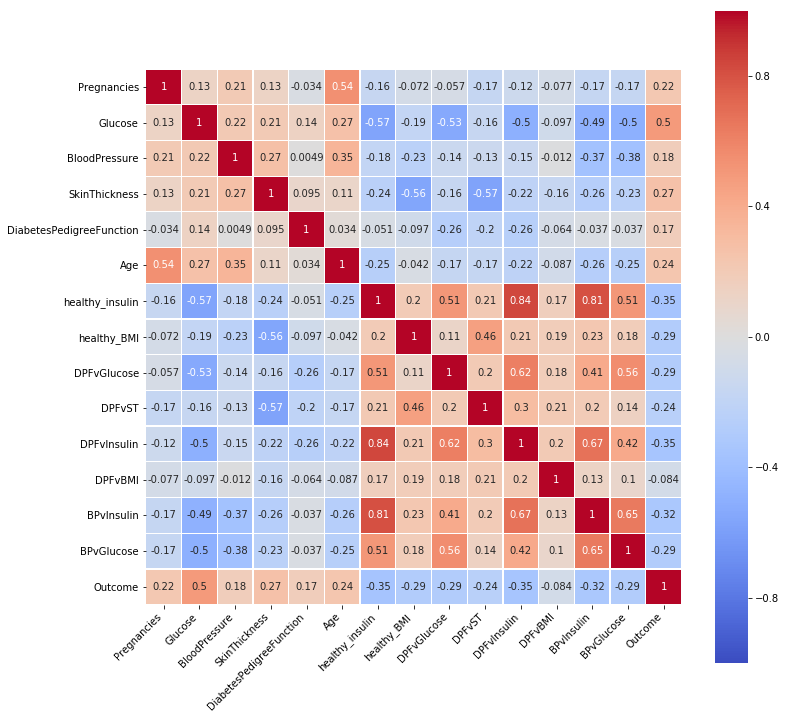

In [24]:
fig , ax = plt.subplots(figsize = (12 , 12)) 

sns.heatmap(final_data.corr() , vmin = -1 , vmax = 1 , center = 0 , square = True , 
                 cmap = 'coolwarm' , linewidths = 0.2 , annot = True)

ax.set_xticklabels(ax.get_xticklabels() , rotation = 45 , horizontalalignment = 'right')

plt.show()

#### Machine Learning

In [36]:
from sklearn.model_selection import train_test_split

#Removing features with low correlation
X = final_data.drop(['Outcome' , 'BloodPressure' , 'DiabetesPedigreeFunction' , 'DPFvBMI'] , axis = 1) 

y = final_data.Outcome

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.3 , 
                                                       stratify = y)
X.head()

,Pregnancies,Glucose,SkinThickness,Age,healthy_insulin,healthy_BMI,DPFvGlucose,DPFvST,DPFvInsulin,BPvInsulin,BPvGlucose
0,0.352941,0.670968,0.528302,0.483333,0,0,0,0,0,0,0
1,0.058824,0.264516,0.415094,0.166667,1,1,1,0,1,1,1
2,0.470588,0.896774,0.258243,0.183333,0,1,0,0,0,0,0
3,0.058824,0.290323,0.301887,0.000000,1,0,1,0,1,1,1
4,0.000000,0.600000,0.528302,0.200000,0,0,0,0,0,0,0


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

classifiers = {'KNN': KNeighborsClassifier() , 'Gaussian NB' : GaussianNB() , 
               'MultinomialNB' : MultinomialNB(), 'Decision Tree' : DecisionTreeClassifier(random_state = 42) ,
               'SVM' : SVC(random_state = 42) , 'Logistic Regression' : LogisticRegression(), 
               'Random Forests' : RandomForestClassifier(random_state = 42 , bootstrap = True, 
                                                         max_depth = None, max_features = 2, 
                                                         min_samples_leaf = 3, min_samples_split = 8,
                                                         n_estimators = 200) , 
               'Extra Trees' : ExtraTreesClassifier(random_state = 42) , 
               'AdaBoost' : AdaBoostClassifier(random_state = 42)}
               

In [38]:
def classification():
    for key , val in classifiers.items():
    
        val.fit(X_train , y_train)
        prediction = val.predict(X_test)
        score = cross_val_score(val , X , y , cv = 10 , scoring = 'accuracy').mean()

        print('\n' , key , '\n')
        print('Classification Report:\n' , metrics.classification_report(y_test , prediction))
        print('\nConfusion Matrix:\n' , metrics.confusion_matrix(y_test , prediction))
        print('\nCross Validation Score: ' , score)
    
classification()    


 KNN 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       150
         1.0       0.60      0.49      0.54        81

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231


Confusion Matrix:
 [[123  27]
 [ 41  40]]

Cross Validation Score:  0.7148838004101161

 Gaussian NB 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76       150
         1.0       0.58      0.90      0.71        81

    accuracy                           0.74       231
   macro avg       0.75      0.77      0.73       231
weighted avg       0.80      0.74      0.74       231


Confusion Matrix:
 [[97 53]
 [ 8 73]]

Cross Validation Score:  0.6834757347915242

 MultinomialNB 

Classification Report:
               precision    recall  f1-score   support

     

The following models have the highest accuracy:

Random Forests

Logistic Regression

SVM

GaussianNB 

MultinomialNB

Naive Bayes Classifiers are giving the best precision and recall scores even though the overall accuracy is lower. 